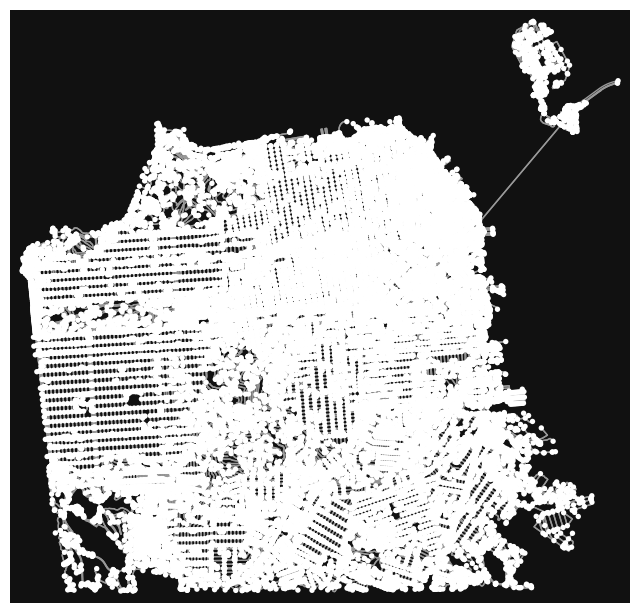

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt

# Get a map of a city (e.g., San Francisco)
place_name = "San Francisco, California, USA"
graph = ox.graph_from_place(place_name, network_type='all')

# Plot the graph of streets
# ox.plot_graph(ox.project_graph(graph))

In [2]:
import osmnx as ox
import networkx as nx

# Specify start and end lat-lon coordinates
start_lat, start_lon = 37.7749, -122.4194  # Example: San Francisco coordinates
end_lat, end_lon = 37.8044, -122.2712    # Example: Oakland coordinates

# Find the nearest nodes in the graph
start_node = ox.distance.nearest_nodes(graph, X=start_lon, Y=start_lat)
end_node = ox.distance.nearest_nodes(graph, X=end_lon, Y=end_lat)

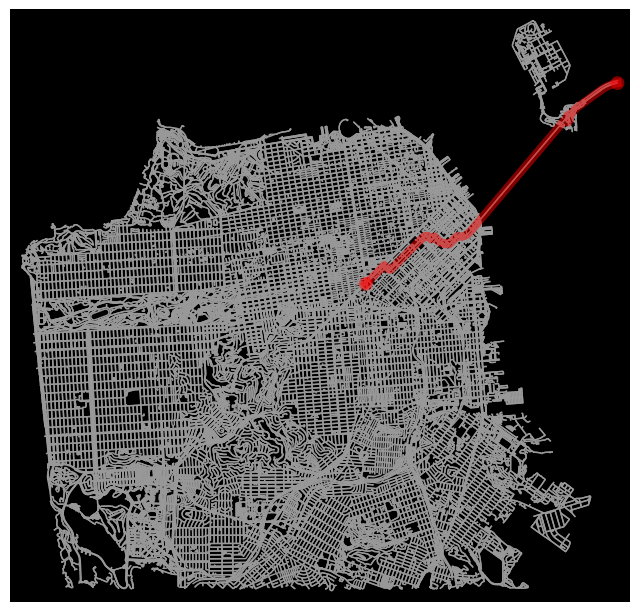

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
# Find the shortest path based on the graph's distance (you can also use other weights like time, etc.)
route = nx.shortest_path(graph, source=start_node, target=end_node, weight='length')

# Plot the route on the map
ox.plot_graph_route(graph, route, route_linewidth=6, node_size=0, bgcolor='k')


In [4]:
import networkx as nx
import osmnx as ox

def generate_directions(graph, route):
    directions = []
    for i in range(1, len(route)):
        # Get the start and end nodes for the segment
        start_node = route[i-1]
        end_node = route[i]
        
        # Find the street (edge) between the nodes
        edge = graph.get_edge_data(start_node, end_node)
        street_name = edge[0].get('name', 'Unnamed road')
        
        # Generate basic directions
        if i == 1:
            directions.append(f"Start at {street_name}.")
        else:
            directions.append(f"Continue onto {street_name}.")
        
    return directions

# Generate step-by-step directions
directions = generate_directions(graph, route)
for step in directions:
    print(step)


Start at Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Unnamed road.
Continue onto Mission Street.
Continue onto Mission Street.
Continue onto Mission Street.
Continue onto Mission Street.
Continue onto Mis

In [6]:
import folium

# Create a map centered at the start point
m = folium.Map(location=[start_lat, start_lon], zoom_start=14)

# Add the route as a polyline
route_coords = [(graph.nodes[node]['y'], graph.nodes[node]['x']) for node in route]
folium.PolyLine(route_coords, color='blue', weight=4, opacity=0.7).add_to(m)

# Add markers for start and end locations
folium.Marker([start_lat, start_lon], popup="Start").add_to(m)
folium.Marker([end_lat, end_lon], popup="End").add_to(m)

# Display map
m.save("route_map.html")


In [6]:
from openai import AzureOpenAI
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Initialize Azure OpenAI client
client = AzureOpenAI(
    api_key=os.getenv("AZURE_OPENAI_KEY"),  # Your Azure OpenAI API key
    api_version=os.getenv("AZURE_OPENAI_VERSION"),  # API version (e.g., "2023-05-15")
    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT")  # Your Azure OpenAI endpoint
)

def ask_azure_openai(prompt):
    """
    Sends a prompt to the Azure OpenAI GPT-4 model and returns the response.

    Args:
        prompt (str): The question or prompt to send to the model.

    Returns:
        str: The model's response.
    """
    try:
        response = client.chat.completions.create(
            model="gpt-4o",  # Use GPT-4 model
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=150,  # Limit response length
            temperature=0.7  # Control randomness (0 = deterministic, 1 = creative)
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        return f"Error: {str(e)}"

if __name__ == "__main__":
    # Ask a question
    question = """
    I have a project of SmartCane. Understand its purpose from the following promt of the associated assistant "You are a smart assistant for a navigation cane aiding visually impaired users. Using real-time camera input, you detect objects ahead, determine their distance, and provide clear, timely navigation instructions. Your responses must be concise and direct, continuously updating as the environment changes. Differentiate between moving and stationary objects, warn about hazards like stairs and curbs, and maintain a calm, confident tone. Prioritize immediate hazards and confirm when the path is clear." . Has the additional fucntionality of helping the people naviage to places using gps.  It also has the capability to take voice input by mic, to control how the navigation goes and other configration. Of couse thier is a voice talkback (this is how it communicates with the user). Note the gps system and making it fully offline is what we are currently working on. Generate a Readme for the project with other sections u see relevant. Use the logo image when nessecary. Genearte the as a markdown code"""
    answer = ask_azure_openai(question)

    # Print the result
    print(f"Question: {question}")
    print(f"Answer: {answer}")

Question: 
    I have a project of SmartCane. Understand its purpose from the following promt of the associated assistant "You are a smart assistant for a navigation cane aiding visually impaired users. Using real-time camera input, you detect objects ahead, determine their distance, and provide clear, timely navigation instructions. Your responses must be concise and direct, continuously updating as the environment changes. Differentiate between moving and stationary objects, warn about hazards like stairs and curbs, and maintain a calm, confident tone. Prioritize immediate hazards and confirm when the path is clear." . Has the additional fucntionality of helping the people naviage to places using gps.  It also has the capability to take voice input by mic, to control how the navigation goes and other configration. Of couse thier is a voice talkback (this is how it communicates with the user). Note the gps system and making it fully offline is what we are currently working on. Generat